In [19]:
import matplotlib.pyplot as plt
from view import *

In [20]:
attributions1 = ["t1", "t2"]
durations1 = ["1:10", "0:15"]


attributions2 = ["t1", "t3"]
durations2 = ["0:35", "0:20"]

attributions3=[]
durations3=[]


In [21]:
attributions_lists = []
attributions_lists.append(attributions1)
attributions_lists.append(attributions2)
attributions_lists.append(attributions3)

durations_lists = []
durations_lists.append(durations1)
durations_lists.append(durations2)
durations_lists.append(durations3)
attributions_lists, durations_lists

([['t1', 't2'], ['t1', 't3'], []], [['1:10', '0:15'], ['0:35', '0:20'], []])

In [22]:
def consolidate_attributions_and_durations_lists(attributions_lists, durations_lists):
    all_attributions = []
    all_durations = []

    for att_l_idx, att_list in enumerate(attributions_lists):  # att_l_idx indexes the day corresponding to the attribution list
        for it_idx, it in enumerate(att_list):  # for each item in that attribution list
            try:  # if the current item (it) is already in the all_attribution list
                idx = all_attributions.index(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations[idx] += str_to_timedelta(it_dur)
#                 print("try", all_attributions, all_durations)
            except ValueError:  #  else
                all_attributions.append(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations.append(str_to_timedelta(it_dur))
#                 print("except", all_attributions, all_durations)

    return all_attributions, all_durations

consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

(['t1', 't2', 't3'],
 [datetime.timedelta(seconds=6300),
  datetime.timedelta(seconds=900),
  datetime.timedelta(seconds=1200)])

In [23]:
3600+45*60

6300

In [111]:
weeks = 3
input_date = datetime.datetime.strptime("2020-01-05", DATE_FORMAT_YMD).date()

one_day = timedelta(days=1)
last_monday = input_date + timedelta(days=-input_date.weekday())  # takes the monday before the given date
for w in range(weeks):
    wk_monday = last_monday + timedelta(days=-7*w)
    print("Mon", wk_monday, "- Sun", wk_monday+timedelta(days=+6))
    wk_range = [(wk_monday + i*one_day) for i in range(7)] 

Mon 2019-12-30 - Sun 2020-01-05
Mon 2019-12-23 - Sun 2019-12-29
Mon 2019-12-16 - Sun 2019-12-22


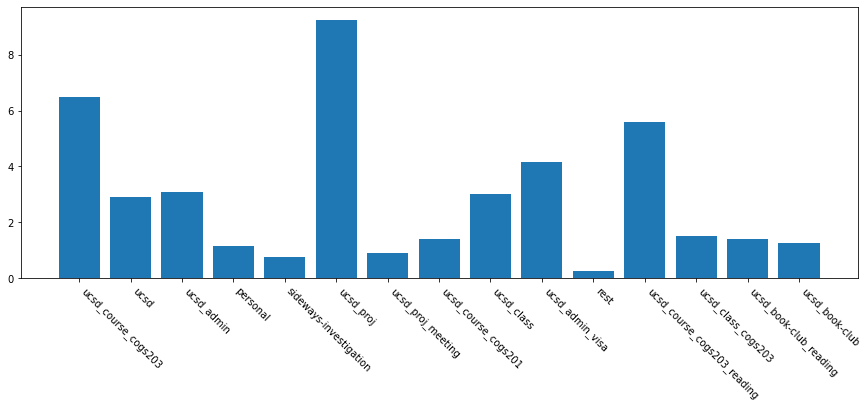

In [28]:
def get_attributions_and_durations(strdate):
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            daily_journal = f.read().strip()
    except FileNotFoundError as e:
        # if file is not found, return empty lists
        return [],[]

    duration_attribution_list = re.findall('\^T([a-zA-Z0-9_-]+)=(\d?\d:\d\d)', daily_journal)  #TODO: include format 2.5 (for 2.5 hours = 2:30)

    attributions = []
    durations = []                                                                                                                                                                                      
    for item in duration_attribution_list:
        attributions.append(item[0])
        durations.append(item[1])
    
    return attributions, durations

attributions_lists = []
durations_lists = []
for day in ["2020-11-01", "2020-11-02", "2020-11-03", "2020-11-04", "2020-11-05"]:
    attributions, durations = get_attributions_and_durations(day)
    attributions_lists.append(attributions)
    durations_lists.append(durations)
atts, durs = consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

plt.figure(figsize=(15,5))
plt.bar(range(len(durs)), [dur.seconds/3600 for dur in durs], tick_label=atts)
plt.xticks(rotation=-45, ha="left");

In [82]:
atts, durs

(['ucsd_course_cogs203',
  'ucsd',
  'ucsd_admin',
  'personal',
  'sideways-investigation',
  'ucsd_proj',
  'ucsd_proj_meeting',
  'ucsd_course_cogs201',
  'ucsd_class',
  'ucsd_admin_visa',
  'rest',
  'ucsd_course_cogs203_reading',
  'ucsd_class_cogs203',
  'ucsd_book-club_reading',
  'ucsd_book-club'],
 [datetime.timedelta(seconds=23400),
  datetime.timedelta(seconds=10500),
  datetime.timedelta(seconds=11100),
  datetime.timedelta(seconds=4200),
  datetime.timedelta(seconds=2700),
  datetime.timedelta(seconds=33300),
  datetime.timedelta(seconds=3300),
  datetime.timedelta(seconds=5100),
  datetime.timedelta(seconds=10800),
  datetime.timedelta(seconds=15000),
  datetime.timedelta(seconds=900),
  datetime.timedelta(seconds=20100),
  datetime.timedelta(seconds=5400),
  datetime.timedelta(seconds=5100),
  datetime.timedelta(seconds=4500)])

In [99]:
# l = zeros(len(atts), "str")
lvl_1 = []
for i_att, att in enumerate(atts):
    print(att.split('_')[0])
    lvl_1.append(att.split('_')[0])
#     l[i_att] = att.split('_')[0]
    
indices = [i for i, x in enumerate(lvl_1) if x == "ucsd"]

sum(array(durs)[array(indices)])


ucsd
ucsd
ucsd
personal
sideways-investigation
ucsd
ucsd
ucsd
ucsd
ucsd
rest
ucsd
ucsd
ucsd
ucsd


datetime.timedelta(days=1, seconds=61200)